In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
%matplotlib inline
import skimage
from skimage.io import  imread, imshow, imsave
from cv2 import equalizeHist
from skimage.color import rgb2gray
from skimage import img_as_float, img_as_ubyte
from skimage import data, io, filters, color, img_as_float, transform, exposure
import random
from scipy.ndimage.filters import median_filter
from PIL import Image, ImageFilter, ImageChops
img = io.imread('13.jpg')


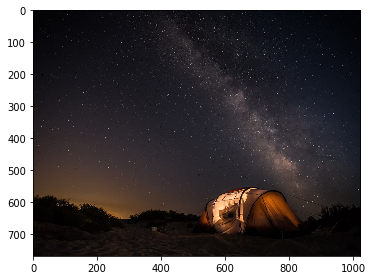

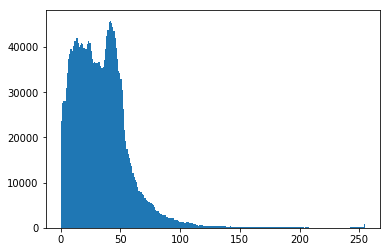

C:\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


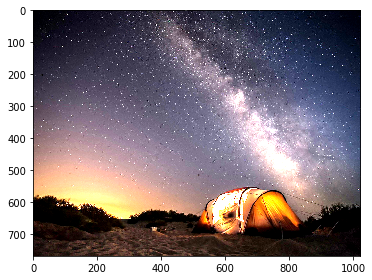

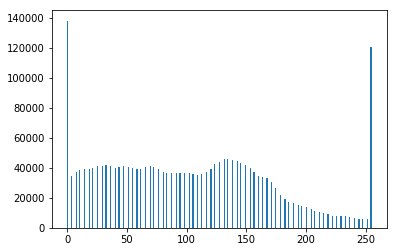

In [2]:
im = img
io.imshow(im)
io.show()

plt.hist(im.flat, bins=np.arange(256))
plt.show()

hist, bines = exposure.histogram(im, 256)
l = 0
r = 255
lcount = hist[0]
rcount = hist[255]

while(lcount<im.size*0.05):
        l=l+1
        lcount=lcount+hist[l]
        
while(rcount<im.size*0.05):
        r=r-1
        rcount=rcount+hist[r]

cntrst = exposure.rescale_intensity(im, in_range=(l,r),out_range=(0,255))
io.imshow(cntrst)
io.imsave('cntrst.jpg', cntrst)
io.show()

plt.hist(cntrst.flat, bins=np.arange(256))
plt.show()



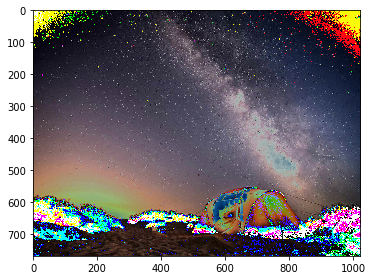

In [45]:
def difference (img1, img2):
    img = abs(img2 - img1)
    return img

dif = difference(im, cntrst)
io.imshow(dif)
io.imsave('dif.jpg', dif)

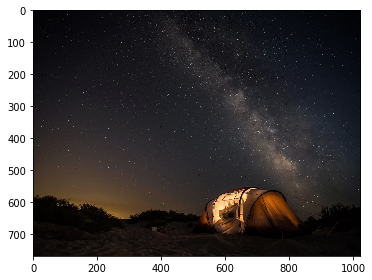

In [46]:
#rast po kanalam
def exp(img):
    y, x = exposure.histogram(img)
    xmin, xmax = int(np.percentile(x, 0)), int(np.percentile(x, 100))
    new_img = np.array([np.array([
            np.uint8((px - xmin) * (255 / (xmax - xmin))) for px in row]) for row in img])
    return new_img
def kanstr(img):
    r = exp(img[:, :, 0])
    g = exp(img[:, :, 1])
    b = exp(img[:, :, 2])
    return np.dstack((r, g, b))

rgbexp = kanstr(img)
io.imshow(rgbexp)
io.imsave('rgbexp.jpg', rgbexp)

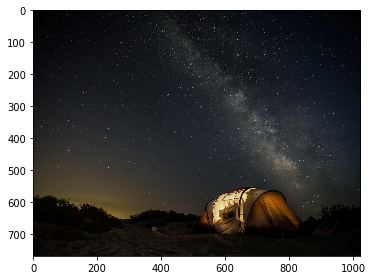

In [50]:
def grayworld(img):
    avg_r = np.average(img[: , : , 0])
    avg_g = np.average(img[: , : , 1])
    avg_b = np.average(img[: , : , 2])
    avg_all = np.average(img)
    img[: , : , 0] = np.clip(img[: , : , 0]*avg_all/avg_r, 0, 255)
    img[: , : , 1] = np.clip(img[: , : , 1]*avg_all/avg_g, 0, 255)
    img[: , : , 2] = np.clip(img[: , : , 2]*avg_all/avg_b, 0, 255)
    
image = img
grayworld(image)
io.imshow(image)
io.imsave('gw.jpg', image)



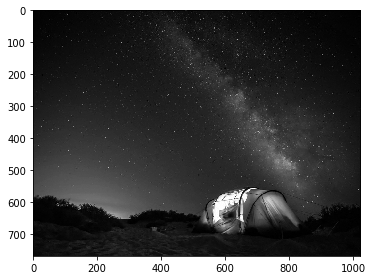

In [3]:
#gray
image = io.imread('13.jpg')
gray = image[:,:,0]
gray = np.array(gray, dtype = 'uint8')
io.imshow(gray)
io.imsave('gray.jpg', gray)

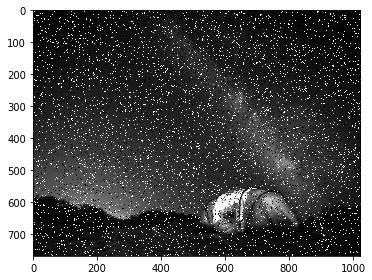

In [52]:
# perez
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

noise_img = sp_noise(gray,0.05)
io.imshow(noise_img)
io.imsave('noise_img.jpg', noise_img)

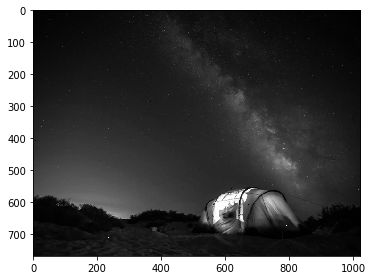

In [53]:
#median
from scipy.ndimage.filters import median_filter
med = median_filter(noise_img, 3)
io.imshow(med)
io.imsave('med.jpg', med)


C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: 99.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


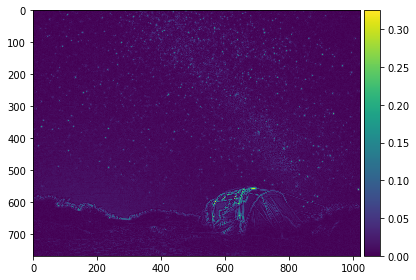

In [7]:
#map
gauss = img_as_float(gauss)
autogauss = img_as_float(autogauss)
io.imshow(np.abs(gauss - autogauss))
io.imsave('99.jpg', np.abs(gauss - autogauss))

In [5]:
def Convolution(image, kernel):
    
    kernel = np.flipud(np.fliplr(kernel))    
    output = np.zeros_like(image)            
    
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     
        for y in range(image.shape[0]):
            
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output

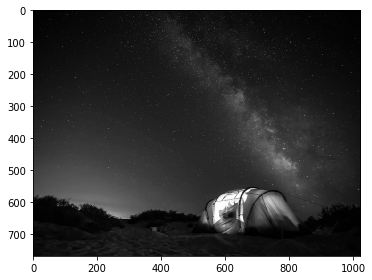

In [56]:
# avg
kernel = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
averaging = Convolution(gray, kernel)
io.imshow(averaging)
io.imsave('40.jpg', averaging)

#auagv
pilgray = Image.open('gray.jpg')
autoav = pilgray.filter(ImageFilter.SMOOTH) 
autoav.save('41.jpg')


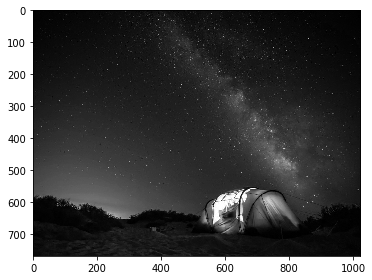

In [57]:
# sdvig
kernel = np.array([[0,0,0],[1,0,0],[0,0,0]])
sdvig1 = Convolution(gray, kernel)
io.imshow(sdvig1)
io.imsave('51.jpg', sdvig1)

# autosdvig
pilgray = Image.open('gray.jpg')
autosdvig = ImageChops.offset(pilgray, 1,0)
autosdvig.save('autosdvig.jpg')

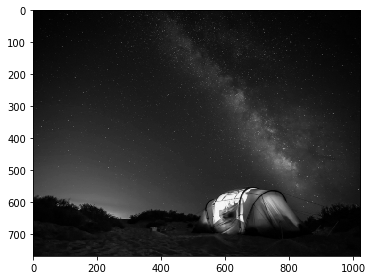

In [6]:
# gauss
kernel = np.array([[0.06,0.12,0.06],[0.12,0.25,0.12],[0.06,0.12,0.06]])
gauss = Convolution(gray, kernel)
io.imshow(gauss)
io.imsave('91.jpg', gauss)

# autogauss
pilgray = Image.open('gray.jpg')
autogauss = pilgray.filter(ImageFilter.GaussianBlur) 
autogauss.save('autogauss.jpg')

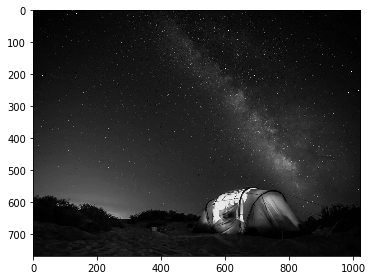

In [65]:
# rez
kernel = np.array([[0,-0.02,0],[-0.02,1,-0.02],[0,-0.02,0]])
sharpened = Convolution(gray, kernel)
io.imshow(sharpened)
io.imsave('73.jpg', sharpened)

# autorez
pilgray = Image.open('gray.jpg')
autosharp = pilgray.filter(ImageFilter.SHARPEN) 
autosharp.save('autosharp.jpg')

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


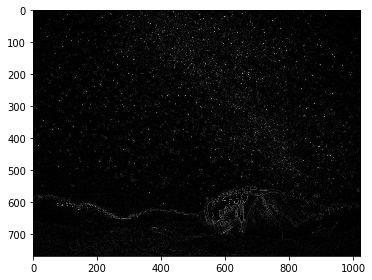

In [78]:
unsharp_image = img_as_float(unsharp_image)
autosharp = img_as_float(autosharp)
io.imshow(np.abs(unsharp_image - autosharp))
io.imsave('6.jpg', np.abs(unsharp_image - autosharp))

In [74]:
Unsharp mask
gaussian_3 = cv2.GaussianBlur(gray, (9,9), 10.0)
unsharp_image = cv2.addWeighted(gray, 1.5, gaussian_3, -0.5, 0, gray)
cv2.imwrite('unsharp_image.jpg',unsharp_image)

True